In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os
from IPython.display import Image
from IPython.core.display import display, HTML

In [2]:
import pandas_profiling as pf

In [10]:
hd = pd.read_csv('data/hd/hd2018.csv', encoding='latin_1')
hd = hd[['UNITID', 'INSTNM', 'ADDR', 'CITY', 'STABBR', 'ZIP', 'HLOFFER', 'HBCU', 'LOCALE', 'INSTCAT', 'COUNTYNM', 'LONGITUDE', 'LATITUDE']]
#hd.set_index('UNITID', inplace=True)
rename = {
    'INSTNM': 'name',
    'ADDR': 'address',
    'CITY': 'city',
    'STABBR': 'state',
    'ZIP': 'zipcode',
    'HLOFFER': 'highest_level_offered',
    'LOCALE': 'locale',
    'INSTCAT': 'category',
    'COUNTYNM': 'county',
    'LONGITUDE': 'longitude',
    'LATITUDE': 'latitude'
}
hd.rename(rename, axis=1, inplace=True)
hd.head()

UNITID                                 name  \
0  100654             Alabama A & M University   
1  100663  University of Alabama at Birmingham   
2  100690                   Amridge University   
3  100706  University of Alabama in Huntsville   
4  100724             Alabama State University   

                          address        city state     zipcode  \
0            4900 Meridian Street      Normal    AL       35762   
1  Administration Bldg Suite 1070  Birmingham    AL  35294-0110   
2                  1200 Taylor Rd  Montgomery    AL  36117-3553   
3                 301 Sparkman Dr  Huntsville    AL       35899   
4            915 S Jackson Street  Montgomery    AL  36104-0271   

   highest_level_offered  HBCU  locale  category             county  \
0                      9     1      12         2     Madison County   
1                      9     2      12         2   Jefferson County   
2                      9     2      12         2  Montgomery County   
3                      9     2      12         2     Madison County   
4                      9     1      12         2  Montgomery County   

   longitude   latitude  
0 -86.568502  34.783368  
1 -86.799345  33.505697  
2 -86.174010  32.362609  
3 -86.640449  34.724557  
4 -86.295677  32.364317

In [11]:
ic = pd.read_csv('data/ic/ic2018.csv', encoding='latin_1')
ic = ic[['UNITID', 'ROOMAMT', 'BOARDAMT', 'APPLFEEU']]
#ic.set_index('UNITID', inplace=True)
rename = {
    'ROOMAMT': 'room_cost',
    'BOARDAMT': 'board_cost',
    'APPLFEEU': 'application_fee'
}
replace = {
    '.': 0
}
ic.rename(rename, axis=1, inplace=True)
ic.replace(replace, inplace=True)
ic.head()

UNITID room_cost board_cost application_fee
0  100654      3682       3728              30
1  100663      7532       4150              30
2  100690         0          0              50
3  100706         0          0              30
4  100724      3346       2076              25

In [12]:
icay = pd.read_csv('data/ic_ay/ic2018_ay.csv', encoding='latin_1')
icay = icay[['UNITID','TUITION2','FEE2','TUITION3','FEE3',]]
#icay.set_index('UNITID', inplace=True)
rename = {
    'TUITION2': 'in_tuition',
    'TUITION3': 'out_tuition',
    'FEE2': 'in_fees',
    'FEE3': 'out_fees',
}
icay.rename(rename, axis=1, inplace=True)
icay.head()

UNITID in_tuition in_fees out_tuition out_fees
0  100654       8610    1134       17220     1134
1  100663       8568       0       19704        0
2  100690       9000     900        9000      900
3  100706       9730     984       21378      984
4  100724       8328    2740       16656     2740

In [13]:
effy = pd.read_csv('data\eefy\effy2018.csv', encoding='latin_1')
effy.head()
effy = effy[['UNITID', 'EFFYLEV','EFYTOTLT', 'EFYTOTLM', 'EFYTOTLW']]
effy = effy[effy['EFFYLEV'] == 2]
#effy.set_index('UNITID', inplace=True)
rename = {
    'EFYTOTLT': 'total_students',
    'EFYTOTLM': 'total_men',
    'EFYTOTLW': 'total_women'
}
effy.rename(rename, axis=1, inplace=True)
effy.head()

UNITID  EFFYLEV  total_students  total_men  total_women
1   100654        2            5343       2279         3064
4   100663        2           14445       5883         8562
7   100690        2             440        152          288
10  100706        2            8145       4612         3533
13  100724        2            4732       1826         2906

In [14]:
efd = pd.read_csv("data\EF2018D\ef2018d.csv", encoding = 'latin_1')
efd = efd[['UNITID','RET_PCF']]
#efd.set_index('UNITID', inplace=True)
rename = {
    'RET_PCF': 'retention'
}
efd.rename(rename, axis=1, inplace=True)
efd.head()

UNITID  retention
0  100654       61.0
1  100663       82.0
2  100690        NaN
3  100706       83.0
4  100724       59.0

In [27]:
sfa = pd.read_csv("data\SFA1718\sfa1718.csv", encoding = 'latin_1')
sfa = sfa[['UNITID', 'SCUGRAD', 'UFLOANN', 'UFLOANT', 'UAGRNTT', 'UPGRNTN', 'UPGRNTT', 'SGRNT_N', 'SGRNT_T', 'IGRNT_N', 'IGRNT_T', 'LOAN_N', 
           'LOAN_T', 'GISTT2']]
#sfa.set_index('UNITID', inplace = True)
rename = {
    'SCUGRAD': 'num_students_financial_aid',
    'UFLOANN': "num_students_receiving_aid_federal",
    'UFLOANT': 'total_federal_aid_awarded',
    'UAGRNTT': "total_aid_awarded",
    'UPGRNTN': 'num_pell_grants',
    'UPGRNTT': 'total_pell_grants',
    'SGRNT_N': 'num_students_receiving_aid_state_local',
    'SGRNT_T': 'total_state_local_aid_awarded',
    'IGRNT_N': 'num_students_receiving_institutional_aid',
    'IGRNT_T': 'total_institutional_aid_awarded',
    'LOAN_N': 'num_students_loans',
    'LOAN_T': 'total_loans_awarded',
    'GISTT2': 'total_scholarships_awarded'
    
}
sfa.rename(rename, axis=1, inplace=True)

sfa.head()

UNITID  num_students_financial_aid  num_students_receiving_aid_federal  \
0  100654                        5039                                3781   
1  100663                       13134                                6734   
2  100690                         318                                 285   
3  100706                        7090                                2972   
4  100724                        4208                                3301   

   total_federal_aid_awarded  total_aid_awarded  num_pell_grants  \
0                   26570635           42706297             3561   
1                   49900764           68096492             4770   
2                    2466263            1182194              244   
3                   19900198           41059715             1913   
4                   35356628           31359053             3134   

   total_pell_grants  num_students_receiving_aid_state_local  \
0           17821852                                    62.0   
1           24210267                                    42.0   
2             783044                                     3.0   
3            8194441                                    12.0   
4           14141019                                    72.0   

   total_state_local_aid_awarded  num_students_receiving_institutional_aid  \
0                       451452.0                                     870.0   
1                        78664.0                                    1710.0   
2                         1290.0                                       5.0   
3                        36056.0                                    1104.0   
4                       740777.0                                     393.0   

   total_institutional_aid_awarded  num_students_loans  total_loans_awarded  \
0                        7181757.0               922.0            5925868.0   
1                       13472311.0              1217.0            8524367.0   
2                           9800.0                 5.0              21749.0   
3                       11733270.0               621.0            3911265.0   
4                        2942281.0               720.0            4830461.0   

   total_scholarships_awarded  
0                   5154738.0  
1                  12752510.0  
2                         NaN  
3                   7183827.0  
4                   4413236.0

In [30]:
dfs = [hd, ic, icay, effy, efd, sfa]

for df in dfs:
    df.set_index('UNITID', inplace=True)

college = hd.join(ic, on='UNITID', how='left')
college = college.join(icay, on='UNITID', how='left')
college = college.join(effy, on='UNITID', how='left')
college = college.join(efd, on='UNITID', how='left')
college = college.join(sfa, on='UNITID', how='left')
college.head()

name                         address  \
UNITID                                                                        
100654             Alabama A & M University            4900 Meridian Street   
100663  University of Alabama at Birmingham  Administration Bldg Suite 1070   
100690                   Amridge University                  1200 Taylor Rd   
100706  University of Alabama in Huntsville                 301 Sparkman Dr   
100724             Alabama State University            915 S Jackson Street   

              city state     zipcode  highest_level_offered  HBCU  locale  \
UNITID                                                                      
100654      Normal    AL       35762                      9     1      12   
100663  Birmingham    AL  35294-0110                      9     2      12   
100690  Montgomery    AL  36117-3553                      9     2      12   
100706  Huntsville    AL       35899                      9     2      12   
100724  Montgomery    AL  36104-0271                      9     1      12   

        category             county  ...  total_aid_awarded  num_pell_grants  \
UNITID                               ...                                       
100654         2     Madison County  ...         42706297.0           3561.0   
100663         2   Jefferson County  ...         68096492.0           4770.0   
100690         2  Montgomery County  ...          1182194.0            244.0   
100706         2     Madison County  ...         41059715.0           1913.0   
100724         2  Montgomery County  ...         31359053.0           3134.0   

       total_pell_grants num_students_receiving_aid_state_local  \
UNITID                                                            
100654        17821852.0                                   62.0   
100663        24210267.0                                   42.0   
100690          783044.0                                    3.0   
100706         8194441.0                                   12.0   
100724        14141019.0                                   72.0   

       total_state_local_aid_awarded num_students_receiving_institutional_aid  \
UNITID                                                                          
100654                      451452.0                                    870.0   
100663                       78664.0                                   1710.0   
100690                        1290.0                                      5.0   
100706                       36056.0                                   1104.0   
100724                      740777.0                                    393.0   

       total_institutional_aid_awarded num_students_loans total_loans_awarded  \
UNITID                                                                          
100654                       7181757.0              922.0           5925868.0   
100663                      13472311.0             1217.0           8524367.0   
100690                          9800.0                5.0             21749.0   
100706                      11733270.0              621.0           3911265.0   
100724                       2942281.0              720.0           4830461.0   

        total_scholarships_awarded  
UNITID                              
100654                   5154738.0  
100663                  12752510.0  
100690                         NaN  
100706                   7183827.0  
100724                   4413236.0  

[5 rows x 37 columns]

In [32]:
college.columns

Index(['name', 'address', 'city', 'state', 'zipcode', 'highest_level_offered',
       'HBCU', 'locale', 'category', 'county', 'longitude', 'latitude',
       'room_cost', 'board_cost', 'application_fee', 'in_tuition', 'in_fees',
       'out_tuition', 'out_fees', 'EFFYLEV', 'total_students', 'total_men',
       'total_women', 'retention', 'num_students_financial_aid',
       'num_students_receiving_aid_federal', 'total_federal_aid_awarded',
       'total_aid_awarded', 'num_pell_grants', 'total_pell_grants',
       'num_students_receiving_aid_state_local',
       'total_state_local_aid_awarded',
       'num_students_receiving_institutional_aid',
       'total_institutional_aid_awarded', 'num_students_loans',
       'total_loans_awarded', 'total_scholarships_awarded'],
      dtype='object')

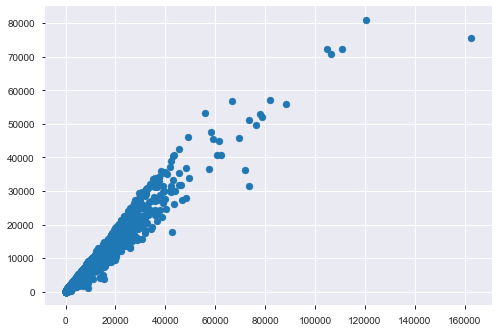

In [41]:
x = college['total_students']
y = college['num_students_financial_aid']

plt.scatter(x,y)

In [31]:
college.profile_report()

In [12]:
college.to_csv('college.csv')